<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">Import Libraries</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">Read Data</h2>
</div>


In [2]:
df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Data/Cleaned/data1clean.csv')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_2,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,0.9424,0.7710,0.6806,0.6896,0.0030,0
1,89272,1173.1810,460.2551,251.9546,0.8369,0.9641,0.7584,0.8151,0.7325,0.0028,1
2,60955,999.7890,386.9247,209.1255,0.8414,0.9465,0.7263,0.7663,0.7200,0.0034,0
3,79537,1439.5129,466.7973,221.2136,0.8806,0.9437,0.7568,0.4823,0.6817,0.0028,0
4,96395,1352.6740,515.8730,246.5945,0.8784,0.9549,0.7428,0.6620,0.6791,0.0026,0


In [3]:
df2 = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Data/Cleaned/data2clean.csv')
df2.head()

,AREA,MINOR_AXIS,ECCENTRICITY,EQDIASQ,CONVEX_AREA,ASPECT_RATIO,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_3,Class
0,73107,217.7261,0.8705,305.0946,77579,2.0319,0.6896,0.0061,0.4756,0
1,89272,251.9546,0.8369,337.1419,92598,1.8267,0.7325,0.0052,0.5366,1
2,60955,209.1255,0.8414,278.5863,64400,1.8502,0.7200,0.0063,0.5184,0
3,79537,221.2136,0.8806,318.2289,84281,2.1102,0.6817,0.0059,0.4648,0
4,96395,246.5945,0.8784,350.3340,100950,2.0920,0.6791,0.0054,0.4612,0


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">Checking For Skew</h2>
</div>


### Dataset 1

In [4]:
df.skew()

AREA            -0.283972
PERIMETER        1.309697
MAJOR_AXIS      -0.476383
MINOR_AXIS       0.125943
ECCENTRICITY    -1.496670
SOLIDITY        -1.870730
EXTENT          -1.138123
ROUNDNESS       -0.547435
COMPACTNESS      0.019181
SHAPEFACTOR_2    1.912691
Class            0.000000
dtype: float64

In [5]:
print("Skew is within range -2 < :) < 2")

Skew is within range -2 < :) < 2


### Dataset 2

In [6]:
df2.skew()

AREA            -0.284362
MINOR_AXIS       0.139168
ECCENTRICITY    -1.506768
EQDIASQ         -0.623634
CONVEX_AREA     -0.176736
ASPECT_RATIO     0.264598
COMPACTNESS      0.010828
SHAPEFACTOR_1    1.898954
SHAPEFACTOR_3    0.258014
Class            0.000000
dtype: float64

In [7]:
print("Skew is within range -2 < :) < 2")

Skew is within range -2 < :) < 2


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">X & y Split</h2>
</div>


## Dataset 1

In [8]:
X = df.drop(columns=['Class'],axis=1)
y = df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 3193 rows and 10 columns.
X_test have 799 rows and 10 columns.


## Dataset 2

In [11]:
X2 = df2.drop(columns=['Class'],axis=1)
y2 = df2['Class']

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [13]:
row, col = X_train2.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test2.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 3193 rows and 9 columns.
X_test have 799 rows and 9 columns.


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">Scalers & Transformers</h2>
</div>

## Standard Scaler

### Dataset 1

In [14]:
scaler = StandardScaler()
X_train_stanscaled = scaler.fit_transform(X_train)
X_test_stanscaled = scaler.fit_transform(X_test)

# Save the scaler to a file using pickle
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Scalers/'
with open(path_of_file + 'standardscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Dataset 2

In [15]:
scaler = StandardScaler()
X_train_stanscaled2 = scaler.fit_transform(X_train2)
X_test_stanscaled2 = scaler.fit_transform(X_test2)

# Save the scaler to a file using pickle
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Scalers/'
with open(path_of_file + 'standardscaler2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [16]:
print("Note to self: Will test this scaler on KNN, SVM and Logistic Regression model")

Note to self: Will test this scaler on KNN, SVM and Logistic Regression model


## MinMax Scaler

### Dataset 1

In [17]:
scaler = MinMaxScaler()
X_train_minmaxscaled = scaler.fit_transform(X_train)
X_test_minmaxscaled = scaler.fit_transform(X_test)

# Save the scaler to a file using pickle
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Scalers/'
with open(path_of_file + 'minmaxscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Dataset 2

In [18]:
scaler = MinMaxScaler()
X_train_minmaxscaled2 = scaler.fit_transform(X_train2)
X_test_minmaxscaled2 = scaler.fit_transform(X_test2)

# Save the scaler to a file using pickle
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Scalers/'
with open(path_of_file + 'minmaxscaler2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [19]:
print("Note to self: Will test this scaler on neural network model")

Note to self: Will test this scaler on neural network model


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 30px;">Machine Learning Models</h2>
</div>

In [20]:
tf.random.set_seed(12)

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 24px;">Neural Networks</h2>
</div>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Neural Network for MinMaxScaled Data (Using Sigmoid Activation) with Dataset 1:</h2>
</div>

In [21]:
# Define the neural network architecture
model_minmax = keras.Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_dim=X_train_minmaxscaled.shape[1]),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_minmax.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_minmax.summary() # 30 coef * 10 = 300 samples

# Train the model
history = model_minmax.fit(X_train_minmaxscaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Suppose your trained model is named 'model'
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'minmaxneural1.pkl', 'wb') as model_file:
    pickle.dump(model_minmax, model_file)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5047 - val_loss: 0.6883 - val_accuracy: 0.7437
Epoch 2/10
90/90 [==============================] - 0s 948us/step - loss: 0.6856 - accuracy: 0.5510 - val_loss: 0.6796 - val_accuracy: 0.7437
Epoc

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Evaluation for MinMaxScaled Model with Dataset 1</h2>
</div>

In [22]:
# Evaluate the model on the test set
test_loss, test_acc = model_minmax.evaluate(X_test_minmaxscaled, y_test)
print("Min-Max Scaled Test Data accuracy (D1):", test_acc)

25/25 [==============================] - 0s 412us/step - loss: 0.3271 - accuracy: 0.8711
Min-Max Scaled Test Data accuracy (D1): 0.8710888624191284


In [23]:
# Predictions from the MinMaxScaled model
y_pred_minmax = model_minmax.predict(X_test_minmaxscaled)
y_pred_minmax = (y_pred_minmax > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the MinMaxScaled model
f1_minmax = f1_score(y_test, y_pred_minmax)
print("F1-score on Test Set for MinMaxScaled Model (D1):", f1_minmax)
print()
kappa_score = cohen_kappa_score(y_test, y_pred_minmax)
print("Cohen's Kappa Score on test (D1):", kappa_score)

25/25 [==============================] - 0s 334us/step
F1-score on Test Set for MinMaxScaled Model (D1): 0.8748481166464155

Cohen's Kappa Score on test (D1): 0.7420908637920607


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for MinMaxScaled Model with Dataset 1</h2>
</div>

25/25 [==============================] - 0s 334us/step


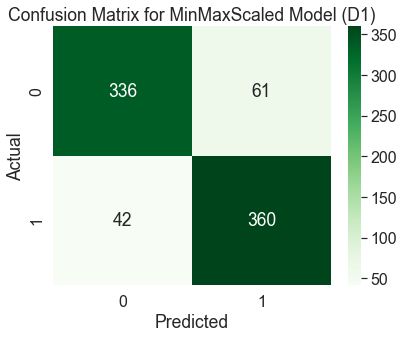

In [24]:
minmax_cm = confusion_matrix(y_test, (model_minmax.predict(X_test_minmaxscaled) > 0.5).astype(int))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(minmax_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MinMaxScaled Model (D1)')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Neural Network for MinMaxScaled Data (Using Sigmoid Activation) with Dataset 2:</h2>
</div>

In [25]:
# Define the neural network architecture
model_minmax2 = keras.Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_dim=X_train_minmaxscaled2.shape[1]),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_minmax2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_minmax2.summary() # 30 coef * 10 = 300 samples

# Train the model
history2 = model_minmax2.fit(X_train_minmaxscaled2, y_train2, epochs=10, batch_size=32, validation_split=0.1)

# Suppose your trained model is named 'model'
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'minmaxneural2.pkl', 'wb') as model_file:
    pickle.dump(model_minmax2, model_file)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5468 - val_loss: 0.6731 - val_accuracy: 0.7719
Epoch 2/10
90/90 [==============================] - 0s 576us/step - loss: 0.6589 - accuracy: 0.7334 - val_loss: 0.6404 - val_accuracy: 0.8625
Ep

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Evaluation for MinMaxScaled Model with Dataset 2</h2>
</div>

In [26]:
test_loss2, test_acc2 = model_minmax2.evaluate(X_test_minmaxscaled2, y_test2)
print("Min-Max Scaled Test Data accuracy (D2):", test_acc2)

25/25 [==============================] - 0s 426us/step - loss: 0.2982 - accuracy: 0.8698
Min-Max Scaled Test Data accuracy (D2): 0.8698372840881348


In [27]:
# Predictions from the MinMaxScaled model
y_pred_minmax2 = model_minmax2.predict(X_test_minmaxscaled2)
y_pred_minmax2 = (y_pred_minmax2 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the MinMaxScaled model
f1_minmax2 = f1_score(y_test2, y_pred_minmax2)
print("F1-score on Test Set for MinMaxScaled Model (D2):", f1_minmax2)
print()
kappa_score2 = cohen_kappa_score(y_test2, y_pred_minmax2)
print("Cohen's Kappa Score on test (D2):", kappa_score2)

25/25 [==============================] - 0s 310us/step
F1-score on Test Set for MinMaxScaled Model (D2): 0.8719211822660099

Cohen's Kappa Score on test (D2): 0.7396317695865241


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for MinMaxScaled Model with Dataset 2</h2>
</div>

25/25 [==============================] - 0s 309us/step


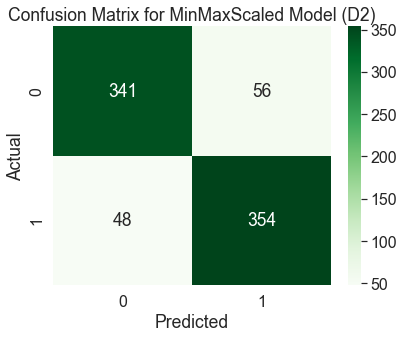

In [28]:
minmax_cm2 = confusion_matrix(y_test2, (model_minmax2.predict(X_test_minmaxscaled2) > 0.5).astype(int))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(minmax_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MinMaxScaled Model (D2)')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Time for some fine tuning for Dataset 1</h2>
</div>

1. Increased the number of hidden layers and neurons per layer to potentially allow the model to learn more complex patterns.
2. Used the Adam optimizer with a lower learning rate for better convergence.
3. Added an EarlyStopping callback to monitor validation loss and stop training if it doesn't improve for a certain number of epochs (in this case, patience is set to 3).

In [29]:
#tf.random.set_seed(12)
# Define the neural network architecture
model_minmax3 = Sequential([
    Dense(128, activation='sigmoid', input_dim=X_train_minmaxscaled.shape[1]),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_minmax3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping3 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_minmax3.summary()

# Train the model with hyperparameter tuning
history3 = model_minmax3.fit(
    X_train_minmaxscaled, y_train,
    epochs=20, batch_size=300,
    validation_split=0.1,
    callbacks=[early_stopping3]
)

# Suppose your trained model is named 'model'
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'minmaxneuraltuned1.pkl', 'wb') as model_file:
    pickle.dump(model_minmax3, model_file)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1408      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6971 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 2/20

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Evaluation for tuned MinMaxScaled Model with Dataset 1</h2>
</div>

In [30]:
# Evaluate the model on the test set
test_loss3, test_acc3 = model_minmax3.evaluate(X_test_minmaxscaled, y_test)
print("Tuned Min-Max Scaled Test Data accuracy (D1):", test_acc3)

25/25 [==============================] - 0s 1ms/step - loss: 0.5232 - accuracy: 0.8298
Tuned Min-Max Scaled Test Data accuracy (D1): 0.8297872543334961


In [31]:
# Predictions from the MinMaxScaled model
y_pred_minmax3 = model_minmax3.predict(X_test_minmaxscaled)
y_pred_minmax3 = (y_pred_minmax3 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the MinMaxScaled model
f1_minmax3 = f1_score(y_test, y_pred_minmax3)
print("F1-score for Test Data for the Tuned MinMaxScaled Model (D1):", f1_minmax3)
print()
kappa_score3 = cohen_kappa_score(y_test, y_pred_minmax3)
print("Cohen's Kappa Score on test (D1):", kappa_score3)

25/25 [==============================] - 0s 804us/step
F1-score for Test Data for the Tuned MinMaxScaled Model (D1): 0.8502202643171807

Cohen's Kappa Score on test (D1): 0.6590056108551847


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for tuned MinMaxScaled Model for Dataset 1</h2>
</div>

25/25 [==============================] - 0s 749us/step


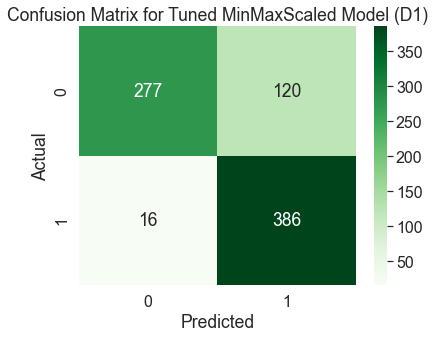

In [32]:
minmax_cm3 = confusion_matrix(y_test, (model_minmax3.predict(X_test_minmaxscaled) > 0.5).astype(int))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(minmax_cm3, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned MinMaxScaled Model (D1)')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Time for some fine tuning for Dataset 2</h2>
</div>

1. Increased the number of hidden layers and neurons per layer to potentially allow the model to learn more complex patterns.
2. Used the Adam optimizer with a lower learning rate for better convergence.
3. Added an EarlyStopping callback to monitor validation loss and stop training if it doesn't improve for a certain number of epochs (in this case, patience is set to 3).

In [33]:
#tf.random.set_seed(12)
# Define the neural network architecture
model_minmax4 = Sequential([
    Dense(128, activation='sigmoid', input_dim=X_train_minmaxscaled2.shape[1]),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_minmax4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping4 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_minmax4.summary()

# Train the model with hyperparameter tuning
history4 = model_minmax4.fit(
    X_train_minmaxscaled2, y_train2,
    epochs=20, batch_size=300,
    validation_split=0.1,
    callbacks=[early_stopping4]
)
# Suppose your trained model is named 'model'
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'minmaxneuraltuned2.pkl', 'wb') as model_file:
    pickle.dump(model_minmax4, model_file)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1280      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11649 (45.50 KB)
Trainable params: 11649 (45.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - 0s 7ms/step - loss: 0.7141 - accuracy: 0.4963 - val_loss: 0.6939 - val_accuracy: 0.4969
Epoch 2/20

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Evaluation for Tuned MinMaxScaled Model using Dataset 2</h2>
</div>

In [34]:
# Evaluate the model on the test set
test_loss4, test_acc4 = model_minmax4.evaluate(X_test_minmaxscaled2, y_test2)
print("Tuned Min-Max Scaled Test Data accuracy (D2):", test_acc)

25/25 [==============================] - 0s 454us/step - loss: 0.3784 - accuracy: 0.8673
Tuned Min-Max Scaled Test Data accuracy (D2): 0.8710888624191284


In [35]:
# Predictions from the MinMaxScaled model
y_pred_minmax4 = model_minmax4.predict(X_test_minmaxscaled2)
y_pred_minmax4 = (y_pred_minmax4 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the MinMaxScaled model
f1_minmax4 = f1_score(y_test2, y_pred_minmax4)
print("F1-score for Test Data for the tuned MinMaxScaled Model (D2):", f1_minmax4)
print()
kappa_score4 = cohen_kappa_score(y_test2, y_pred_minmax4)
print("Cohen's Kappa Score on test:", kappa_score4)

25/25 [==============================] - 0s 332us/step
F1-score for Test Data for the tuned MinMaxScaled Model (D2): 0.8744075829383886

Cohen's Kappa Score on test: 0.73449157962055


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for Tuned MinMaxScaled Model using Dataset 2</h2>
</div>

25/25 [==============================] - 0s 354us/step


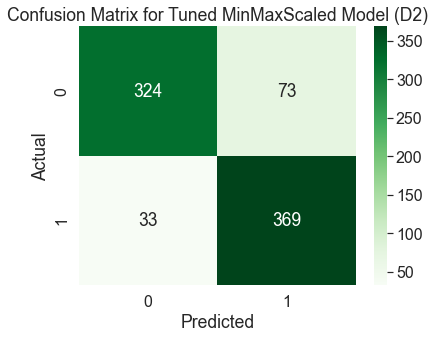

In [36]:
minmax_cm4 = confusion_matrix(y_test2, (model_minmax4.predict(X_test_minmaxscaled2) > 0.5).astype(int))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(minmax_cm4, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned MinMaxScaled Model (D2)')
plt.show()

#

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Neural Network for StandardScaled Data (Using ReLU Activation) using Dataset 1:</h2>
</div>

In [37]:
model_standard5 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train_stanscaled.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_standard5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_standard5.summary()

# Train the model
model_standard5.fit(X_train_stanscaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Suppose your trained model is named 'model'
path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'standardneural1.pkl', 'wb') as model_file:
    pickle.dump(model_standard5, model_file)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                704       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8141 - val_loss: 0.3397 - val_accuracy: 0.8719
Epoch 2/10
90/90 [==============================] - 0s 564us/step - loss: 0.2996 - accuracy: 0.8824 - val_loss: 0.3321 - val_accuracy: 0.8813
Ep

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Evaluation for StandardScaled Model using Dataset 1</h2>
</div>

In [38]:
# Evaluate the model on the test set
test_loss5, test_acc5 = model_standard5.evaluate(X_test_stanscaled, y_test)
print("Standard Scaled Test Data accuracy (D1):", test_acc5)

25/25 [==============================] - 0s 418us/step - loss: 0.2694 - accuracy: 0.8861
Standard Scaled Test Data accuracy (D1): 0.8861076235771179


In [39]:
# Predictions from the StandardScaled model
y_pred_standard5 = model_standard5.predict(X_test_stanscaled)
y_pred_standard5 = (y_pred_standard5 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the StandardScaled model
f1_standard5 = f1_score(y_test, y_pred_standard5)
print("F1-score for Test Data for StandardScaled Model (D1):", f1_standard5)
print()
kappa_score5 = cohen_kappa_score(y_test, y_pred_standard5)
print("Cohen's Kappa Score on test data:", kappa_score5)

25/25 [==============================] - 0s 314us/step
F1-score for Test Data for StandardScaled Model (D1): 0.8846641318124209

Cohen's Kappa Score on test data: 0.772259860992348


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for StandardScaled Model using Dataset 1</h2>
</div>

25/25 [==============================] - 0s 317us/step


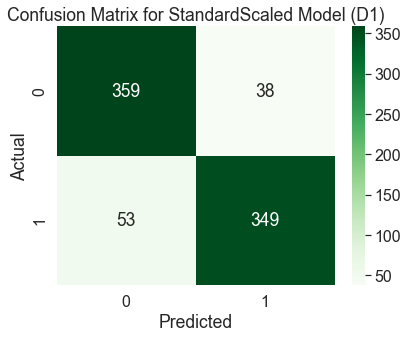

In [40]:
standard_cm5 = confusion_matrix(y_test, (model_standard5.predict(X_test_stanscaled) > 0.5).astype(int))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(standard_cm5, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for StandardScaled Model (D1)')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Time for some fine tuning for Dataset 1</h2>
</div>

1. Added Dropout layers after the first and second hidden layers. Dropout is a regularization technique that randomly drops out a fraction of neurons during training to prevent overfitting.
2. Increased the number of neurons in the first hidden layer to 128 to allow the model to learn more complex patterns.
3. Added an EarlyStopping callback to monitor validation loss and stop training if it doesn't improve for a certain number of epochs (patience is set to 3).

In [41]:
# Define the neural network architecture
model_standard6 = Sequential([
    Dense(128, activation='relu', input_dim=X_train_stanscaled.shape[1]),
    Dropout(0.3),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_standard6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping6 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_standard6.summary()

# Train the model with hyperparameter tuning
history6  = model_standard6.fit(
    X_train_stanscaled, y_train,
    epochs=20, batch_size=300,
    validation_split=0.1,
    callbacks=[early_stopping6]
)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'standardneuraltuned1.pkl', 'wb') as model_file:
    pickle.dump(model_standard6, model_file)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Evaluation for tuned StandardScaled Model using Dataset 1</h2>
</div>

In [42]:
# Evaluate the model on the test set
test_loss6, test_acc6 = model_standard6.evaluate(X_test_stanscaled, y_test)
print("Tuned Standard Scaled Test Data accuracy (D1):", test_acc6)

25/25 [==============================] - 0s 439us/step - loss: 0.2759 - accuracy: 0.8886
Tuned Standard Scaled Test Data accuracy (D1): 0.8886107802391052


In [43]:
# Predictions from the StandardScaled model
y_pred_standard6 = model_standard6.predict(X_test_stanscaled)
y_pred_standard6 = (y_pred_standard6 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the StandardScaled model
f1_standard6 = f1_score(y_test, y_pred_standard6)
print("F1-score for Test Data for the Tuned StandardScaled Model (D1):", f1_standard6)
print()
kappa_score6 = cohen_kappa_score(y_test, y_pred_standard6)
print("Cohen's Kappa Score on test:", kappa_score6)

25/25 [==============================] - 0s 346us/step
F1-score for Test Data for the Tuned StandardScaled Model (D1): 0.8877679697351829

Cohen's Kappa Score on test: 0.7772511848341233


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for tuned StandardScaled Model using Dataset 1</h2>
</div>

25/25 [==============================] - 0s 365us/step


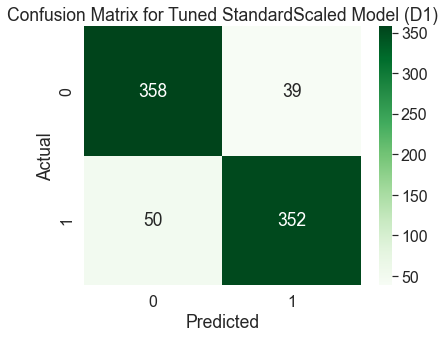

In [44]:
standard_cm6 = confusion_matrix(y_test, (model_standard6.predict(X_test_stanscaled) > 0.5).astype(int))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(standard_cm6, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned StandardScaled Model (D1)')
plt.show()

#

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Neural Network for StandardScaled Data (Using ReLU Activation) using Dataset 2:</h2>
</div>

In [45]:
model_standard7 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train_stanscaled2.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_standard7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_standard7.summary()

# Train the model
model_standard7.fit(X_train_stanscaled2, y_train2, epochs=10, batch_size=32, validation_split=0.1)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'standardneural2.pkl', 'wb') as model_file:
    pickle.dump(model_standard7, model_file)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                640       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8503 - val_loss: 0.3508 - val_accuracy: 0.8562
Epoch 2/10
90/90 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8677 - val_loss: 0.3519 - val_accuracy: 0.8656
Epoc

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Evaluation for StandardScaled Model using Dataset 2</h2>
</div>

In [46]:
# Evaluate the model on the test set
test_loss7, test_acc7 = model_standard7.evaluate(X_test_stanscaled2, y_test2)
print("Standard Scaled Test Data accuracy (D2):", test_acc7)

25/25 [==============================] - 0s 431us/step - loss: 0.2782 - accuracy: 0.8786
Standard Scaled Test Data accuracy (D2): 0.8785982728004456


In [47]:
# Predictions from the StandardScaled model
y_pred_standard7 = model_standard7.predict(X_test_stanscaled2)
y_pred_standard7 = (y_pred_standard7 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the StandardScaled model
f1_standard7 = f1_score(y_test2, y_pred_standard7)
print("F1-score for Test Data for StandardScaled Model (D2):", f1_standard7)
print()
kappa_score7 = cohen_kappa_score(y_test2, y_pred_standard7)
print("Cohen's Kappa Score on test data:", kappa_score7)

25/25 [==============================] - 0s 320us/step
F1-score for Test Data for StandardScaled Model (D2): 0.8779874213836478

Cohen's Kappa Score on test data: 0.7572212145987414


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for StandardScaled Model using Dataset 2</h2>
</div>

25/25 [==============================] - 0s 325us/step


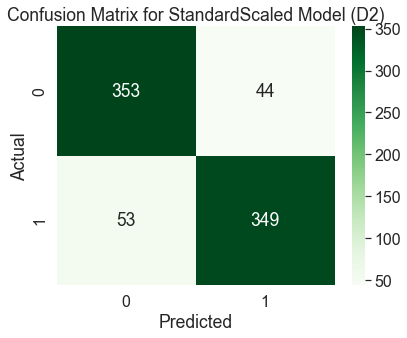

In [48]:
standard_cm7 = confusion_matrix(y_test2, (model_standard7.predict(X_test_stanscaled2) > 0.5).astype(int))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(standard_cm7, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for StandardScaled Model (D2)')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Time for some fine tuning for Dataset 2</h2>
</div>

1. Added Dropout layers after the first and second hidden layers. Dropout is a regularization technique that randomly drops out a fraction of neurons during training to prevent overfitting.
2. Increased the number of neurons in the first hidden layer to 128 to allow the model to learn more complex patterns.
3. Added an EarlyStopping callback to monitor validation loss and stop training if it doesn't improve for a certain number of epochs (patience is set to 3).

In [49]:
# Define the neural network architecture
model_standard8 = Sequential([
    Dense(128, activation='relu', input_dim=X_train_stanscaled2.shape[1]),
    Dropout(0.3),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_standard8.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping8 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_standard8.summary()

# Train the model with hyperparameter tuning
history8 = model_standard8.fit(
    X_train_stanscaled2, y_train2,
    epochs=20, batch_size=300,
    validation_split=0.1,
    callbacks=[early_stopping8]
)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'standardneuraltuned2.pkl', 'wb') as model_file:
    pickle.dump(model_standard8, model_file)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1280      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11649 (45.50 KB)
Trainable params: 11649

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Evaluation for Tuned StandardScaled Model using Dataset 2</h2>
</div>

In [50]:
# Evaluate the model on the test set
test_loss8, test_acc8 = model_standard8.evaluate(X_test_stanscaled2, y_test2)
print("Tuned Standard Scaled Data Test accuracy (D2):", test_acc8)

25/25 [==============================] - 0s 1ms/step - loss: 0.2796 - accuracy: 0.8798
Tuned Standard Scaled Data Test accuracy (D2): 0.8798497915267944


In [51]:
# Predictions from the StandardScaled model
y_pred_standard8 = model_standard8.predict(X_test_stanscaled2)
y_pred_standard8 = (y_pred_standard8 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the StandardScaled model
f1_standard8 = f1_score(y_test2, y_pred_standard8)
print("F1-score for Test Data for the Tuned StandardScaled Model (D2):", f1_standard8)
print()
kappa_score8 = cohen_kappa_score(y_test2, y_pred_standard8)
print("Cohen's Kappa Score on test:", kappa_score8)

25/25 [==============================] - 0s 2ms/step
F1-score for Test Data for the Tuned StandardScaled Model (D2): 0.8808933002481389

Cohen's Kappa Score on test: 0.7596826848968288


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for tuned StandardScaled Model using Dataset 2</h2>
</div>

25/25 [==============================] - 0s 1ms/step


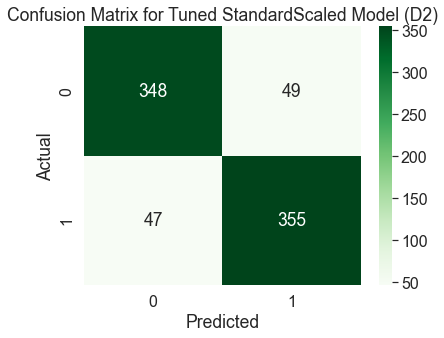

In [52]:
standard_cm8 = confusion_matrix(y_test2, (model_standard8.predict(X_test_stanscaled2) > 0.5).astype(int))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(standard_cm8, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned StandardScaled Model (D2)')
plt.show()

#

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 30px;">K-Nearest Neighbors (KNN)</h2>
</div>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

## Dataset 1

In [53]:
hyperparameters = [{
    'n_neighbors': range(3,21,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train_stanscaled, y_train)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'knn1.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [54]:
best_knn_params = grid_search.best_params_
best_knnscore = grid_search.best_score_
print(best_knn_params)
print(best_knnscore)

{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
0.9536716737618554


## Dataset 2

In [55]:
hyperparameters2 = [{
    'n_neighbors': range(3,21,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

knn2 = KNeighborsClassifier()
grid_search2 = GridSearchCV(knn, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search2.fit(X_train_stanscaled2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'knn2.pkl', 'wb') as model_file:
    pickle.dump(knn2, model_file)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [56]:
best_knn_params2 = grid_search2.best_params_
best_knnscore2 = grid_search2.best_score_
print(best_knn_params2)
print(best_knnscore2)

{'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
0.9537008537483439


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [57]:
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train_stanscaled, y_train.ravel())
y_pred_knn = best_knn.predict(X_test_stanscaled)

In [58]:
print('F1 Score on test data for dataset 1: ', f1_score(y_test, best_knn.predict(X_test_stanscaled), average='weighted'))
print()
kappa_score9 = cohen_kappa_score(y_test, y_pred_knn)
print("Cohen's Kappa Score on test:", kappa_score9)
print()
print("Accuracy (KNN) for test set for dataset 1:", metrics.accuracy_score(y_test, y_pred_knn))

F1 Score on test data for dataset 1:  0.9511885274575095

Cohen's Kappa Score on test: 0.9023726200956818

Accuracy (KNN) for test set for dataset 1: 0.951188986232791


### Dataset 2

In [59]:
best_knn2 = KNeighborsClassifier(**best_knn_params2)
best_knn2.fit(X_train_stanscaled2, y_train2.ravel())
y_pred_knn2 = best_knn2.predict(X_test_stanscaled2)

In [60]:
print('F1 Score on test data for dataset 2: ', f1_score(y_test2, best_knn2.predict(X_test_stanscaled2), average='weighted'))
print()
kappa_score10 = cohen_kappa_score(y_test2, y_pred_knn2)
print("Cohen's Kappa Score on test:", kappa_score10)
print()
print("Accuracy (KNN) for test set for dataset 2:", metrics.accuracy_score(y_test2, y_pred_knn2))

F1 Score on test data for dataset 2:  0.886065867149092

Cohen's Kappa Score on test: 0.7721599508653403

Accuracy (KNN) for test set for dataset 2: 0.886107634543179


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for KNN</h2>
</div>

### Dataset 1

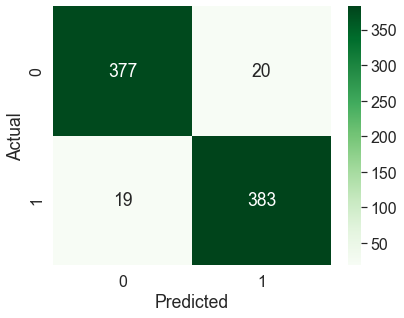

In [61]:
knn_cm = confusion_matrix(y_test, best_knn.predict(X_test_stanscaled))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(knn_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Dataset 2

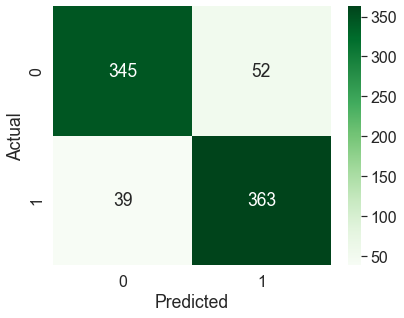

In [62]:
knn_cm2 = confusion_matrix(y_test2, best_knn2.predict(X_test_stanscaled2))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(knn_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 30px;">Support Vector Machines (SVM)</h2>
</div>

An SVM seeks to find a hyperplane that maximizes the margin between data points of different classes. The hyperplane is the decision boundary that separates the classes with the maximum margin.

<!DOCTYPE html>
<html>
  <head>
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
    <script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-MML-AM_CHTML"></script>
  </head>
  <body>
    <div>
      <p>Support Vector Machine (SVM) Algorithm:</p>
      <ul>
        <li>Find the hyperplane that maximally separates the data points of different classes.</li>
        <li>Transform the data into a higher-dimensional space using the kernel trick for nonlinear separation.</li>
        <li>Use support vectors to define the decision boundary.</li>
      </ul>
      <p>The Decision Function:</p>
      <div>
        <span>\( f(x) = \)</span>
        <span>\( \text{sign} \left( \sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b \right) \)</span>
      </div>
      <p>The Objective Function:</p>
      <div>
        <span>\( \text{minimize} \left( \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i, x_j) - \sum_{i=1}^{n} \alpha_i \right) \)</span>
      </div>
      <p>The Kernel Function:</p>
      <div>
        <span>\( K(x, x') = \)</span>
        <span>\( \phi(x) \cdot \phi(x') \)</span>
      </div>
    </div>
  </body>
</html>


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [63]:
svm_params = [{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}]

svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
svm_grid_search.fit(X_train_stanscaled, y_train)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'svm1.pkl', 'wb') as model_file:
    pickle.dump(svm, model_file)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [64]:
best_svm_params = svm_grid_search.best_params_
best_svmscore = grid_search.best_score_
print("Best Parameters:", best_svm_params)
print("Best Score:", best_svmscore)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9536716737618554


### Dataset 2

In [65]:
svm_params2 = [{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}]

svm2 = SVC()
svm_grid_search2 = GridSearchCV(svm2, svm_params2, scoring='f1', cv=5, verbose=True, n_jobs=-1)
svm_grid_search2.fit(X_train_stanscaled2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'svm2.pkl', 'wb') as model_file:
    pickle.dump(svm2, model_file)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [66]:
best_svm_params2 = svm_grid_search2.best_params_
best_svmscore2 = grid_search.best_score_
print("Best Parameters:",best_svm_params2)
print("Best Score:", best_svmscore2)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9536716737618554


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [67]:
best_svm = SVC(**best_svm_params)
best_svm.fit(X_train_stanscaled, y_train)
y_pred_svm = best_svm.predict(X_test_stanscaled)

In [68]:
f1_svm = f1_score(y_test, y_pred_svm)
print("F1 Score on Test Set (SVM) for dataset 1:", f1_svm)

F1 Score on Test Set (SVM) for dataset 1: 0.8955223880597015


In [69]:
print("Accuracy (SVM) for test set for dataset 1:", metrics.accuracy_score(y_test, y_pred_svm))
y_pred_svm_train = best_svm.predict(X_train_stanscaled)
print("Accuracy on train (SVM) for dataset 1:", metrics.accuracy_score(y_train, y_pred_svm_train))
print("Accuracy on test (SVM) for dataset 1:", metrics.accuracy_score(y_test, y_pred_svm))
kappa_score11 = cohen_kappa_score(y_test, y_pred_svm)
print("Cohen's Kappa Score on test:", kappa_score11)

Accuracy (SVM) for test set for dataset 1: 0.8948685857321652
Accuracy on train (SVM) for dataset 1: 0.9069840275602882
Accuracy on test (SVM) for dataset 1: 0.8948685857321652
Cohen's Kappa Score on test: 0.7897289371780893


### Dataset 2

In [70]:
best_svm2 = SVC(**best_svm_params2)
best_svm2.fit(X_train_stanscaled2, y_train2)
y_pred_svm2 = best_svm2.predict(X_test_stanscaled2)

In [71]:
f1_svm2 = f1_score(y_test2, y_pred_svm2)
print("F1 Score on Test Set (SVM) for dataset 2:", f1_svm2)

F1 Score on Test Set (SVM) for dataset 2: 0.8793969849246231


In [72]:
print("Accuracy (SVM) for test set for dataset 2:", metrics.accuracy_score(y_test2, y_pred_svm2))
y_pred_svm_train2 = best_svm2.predict(X_train_stanscaled2)
print("Accuracy on train (SVM) for dataset 2:", metrics.accuracy_score(y_train2, y_pred_svm_train2))
print("ACcuracy on test (SVM) for dataset 2:", metrics.accuracy_score(y_test2, y_pred_svm2))
kappa_score12 = cohen_kappa_score(y_test2, y_pred_svm2)
print("Cohen's Kappa Score on test:", kappa_score12)

Accuracy (SVM) for test set for dataset 2: 0.8798498122653317
Accuracy on train (SVM) for dataset 2: 0.8787973692452239
ACcuracy on test (SVM) for dataset 2: 0.8798498122653317
Cohen's Kappa Score on test: 0.7597203252847494


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for SVM</h2>
</div>

### Dataset 1

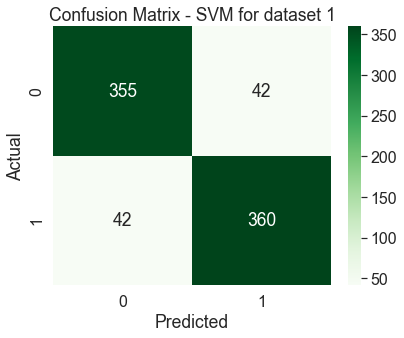

In [73]:
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(dpi=70)
sns.heatmap(svm_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM for dataset 1')
plt.show()

### Dataset 2

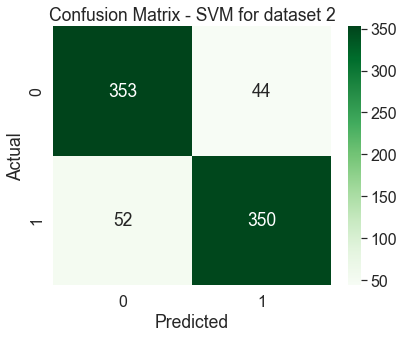

In [74]:
svm_cm2 = confusion_matrix(y_test2, y_pred_svm2)
plt.figure(dpi=70)
sns.heatmap(svm_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM for dataset 2')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Finding the best model</h2>
</div>

In [75]:
accuracy_scores = {}

accuracy_scores['K-Nearest Neighbors'] = metrics.accuracy_score(y_test, y_pred_knn)
accuracy_scores['SVM'] = metrics.accuracy_score(y_test, y_pred_svm)
accuracy_scores['Neural Networks MinMaxscaled'] = metrics.accuracy_score(y_test, y_pred_minmax)
accuracy_scores['Neural Networks Tuned MinMaxscaled'] = metrics.accuracy_score(y_test, y_pred_minmax3)
accuracy_scores['Neural Networks Standardscaled'] = metrics.accuracy_score(y_test, y_pred_standard5)
accuracy_scores['Neural Networks Tuned Standardscaled'] = metrics.accuracy_score(y_test, y_pred_standard6)

# Sort accuracy_scores in descending order by values (accuracy)
sorted_scores = {k: v for k, v in sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True)}

best_method = next(iter(sorted_scores))
best_accuracy = sorted_scores[best_method]

print("Accuracy on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sorted_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {best_method}")
print(f"With Accuracy of: {best_accuracy:.4f}")
print()
print()
Kappa_scores = {}

Kappa_scores['K-Nearest Neighbors'] = cohen_kappa_score(y_test, y_pred_knn)
Kappa_scores['SVM'] = cohen_kappa_score(y_test, y_pred_svm)
Kappa_scores['Neural Networks MinMaxscaled'] = cohen_kappa_score(y_test, y_pred_minmax)
Kappa_scores['Neural Networks Tuned MinMaxscaled'] = cohen_kappa_score(y_test, y_pred_minmax3)
Kappa_scores['Neural Networks Standardscaled'] = cohen_kappa_score(y_test, y_pred_standard5)
Kappa_scores['Neural Networks Tuned Standardscaled'] = cohen_kappa_score(y_test, y_pred_standard6)

# Sort accuracy_scores in descending order by values (accuracy)
sortedk_scores = {k: v for k, v in sorted(Kappa_scores.items(), key=lambda item: item[1], reverse=True)}

bestk_method = next(iter(sortedk_scores))
bestk_accuracy = sortedk_scores[bestk_method]

print("Cohen Kappa score on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedk_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestk_method}")
print(f"With Cohen Kappa score of: {bestk_accuracy:.4f}")
print()
print()
f1_scores = {}

f1_scores['K-Nearest Neighbors'] = f1_score(y_test, y_pred_knn)
f1_scores['SVM'] = f1_score(y_test, y_pred_svm)
f1_scores['Neural Networks MinMaxscaled'] = f1_score(y_test, y_pred_minmax)
f1_scores['Neural Networks Tuned MinMaxscaled'] = f1_score(y_test, y_pred_minmax3)
f1_scores['Neural Networks Standardscaled'] = f1_score(y_test, y_pred_standard5)
f1_scores['Neural Networks Tuned Standardscaled'] = f1_score(y_test, y_pred_standard6)

# Sort accuracy_scores in descending order by values (accuracy)
sortedf1_scores = {k: v for k, v in sorted(f1_scores.items(), key=lambda item: item[1], reverse=True)}

bestf1_method = next(iter(sortedf1_scores))
bestf1_accuracy = sortedf1_scores[bestf1_method]

print("F1 score on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedf1_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestf1_method}")
print(f"With F1 score of: {bestf1_accuracy:.4f}")


Accuracy on Test Dataset 1 Leaderboard:
1. K-Nearest Neighbors: 0.9512
2. SVM: 0.8949
3. Neural Networks Tuned Standardscaled: 0.8886
4. Neural Networks Standardscaled: 0.8861
5. Neural Networks MinMaxscaled: 0.8711
6. Neural Networks Tuned MinMaxscaled: 0.8298

Best Method: K-Nearest Neighbors
With Accuracy of: 0.9512


Cohen Kappa score on Test Dataset 1 Leaderboard:
1. K-Nearest Neighbors: 0.9024
2. SVM: 0.7897
3. Neural Networks Tuned Standardscaled: 0.7773
4. Neural Networks Standardscaled: 0.7723
5. Neural Networks MinMaxscaled: 0.7421
6. Neural Networks Tuned MinMaxscaled: 0.6590

Best Method: K-Nearest Neighbors
With Cohen Kappa score of: 0.9024


F1 score on Test Dataset 1 Leaderboard:
1. K-Nearest Neighbors: 0.9516
2. SVM: 0.8955
3. Neural Networks Tuned Standardscaled: 0.8878
4. Neural Networks Standardscaled: 0.8847
5. Neural Networks MinMaxscaled: 0.8748
6. Neural Networks Tuned MinMaxscaled: 0.8502

Best Method: K-Nearest Neighbors
With F1 score of: 0.9516


In [76]:
accuracy_scores2 = {}

accuracy_scores2['K-Nearest Neighbors'] = metrics.accuracy_score(y_test2, y_pred_knn2)
accuracy_scores2['SVM'] = metrics.accuracy_score(y_test2, y_pred_svm2)
accuracy_scores2['Neural Networks MinMaxscaled'] = metrics.accuracy_score(y_test2, y_pred_minmax2)
accuracy_scores2['Neural Networks Tuned MinMaxscaled'] = metrics.accuracy_score(y_test2, y_pred_minmax4)
accuracy_scores2['Neural Networks Standardscaled'] = metrics.accuracy_score(y_test2, y_pred_standard7)
accuracy_scores2['Neural Networks Tuned Standardscaled'] = metrics.accuracy_score(y_test2, y_pred_standard8)

# Sort accuracy_scores in descending order by values (accuracy)
sorted_scores2 = {k: v for k, v in sorted(accuracy_scores2.items(), key=lambda item: item[1], reverse=True)}

best_method2 = next(iter(sorted_scores2))
best_accuracy2 = sorted_scores2[best_method2]

print("Accuracy on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sorted_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {best_method2}")
print(f"With Accuracy of: {best_accuracy2:.4f}")
print()
print()
Kappa_scores2 = {}

Kappa_scores2['K-Nearest Neighbors'] = cohen_kappa_score(y_test2, y_pred_knn2)
Kappa_scores2['SVM'] = cohen_kappa_score(y_test2, y_pred_svm2)
Kappa_scores2['Neural Networks MinMaxscaled'] = cohen_kappa_score(y_test2, y_pred_minmax2)
Kappa_scores2['Neural Networks Tuned MinMaxscaled'] = cohen_kappa_score(y_test2, y_pred_minmax4)
Kappa_scores2['Neural Networks Standardscaled'] = cohen_kappa_score(y_test2, y_pred_standard7)
Kappa_scores2['Neural Networks Tuned Standardscaled'] = cohen_kappa_score(y_test2, y_pred_standard8)

# Sort accuracy_scores in descending order by values (accuracy)
sortedk_scores2 = {k: v for k, v in sorted(Kappa_scores2.items(), key=lambda item: item[1], reverse=True)}

bestk_method2 = next(iter(sortedk_scores2))
bestk_accuracy2 = sortedk_scores2[bestk_method2]

print("Cohen Kappa score on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedk_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestk_method2}")
print(f"With Cohen Kappa score of: {bestk_accuracy2:.4f}")
print()
print()
f1_scores2 = {}

f1_scores2['K-Nearest Neighbors'] = f1_score(y_test2, y_pred_knn2)
f1_scores2['SVM'] = f1_score(y_test2, y_pred_svm2)
f1_scores2['Neural Networks MinMaxscaled'] = f1_score(y_test2, y_pred_minmax2)
f1_scores2['Neural Networks Tuned MinMaxscaled'] = f1_score(y_test2, y_pred_minmax4)
f1_scores2['Neural Networks Standardscaled'] = f1_score(y_test2, y_pred_standard7)
f1_scores2['Neural Networks Tuned Standardscaled'] = f1_score(y_test2, y_pred_standard8)

# Sort accuracy_scores in descending order by values (accuracy)
sortedf1_scores2 = {k: v for k, v in sorted(f1_scores2.items(), key=lambda item: item[1], reverse=True)}

bestf1_method2 = next(iter(sortedf1_scores2))
bestf1_accuracy2 = sortedf1_scores2[bestf1_method2]

print("F1 score on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedf1_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestf1_method2}")
print(f"With F1 score of: {bestf1_accuracy2:.4f}")


Accuracy on Test Dataset 2 Leaderboard:
1. K-Nearest Neighbors: 0.8861
2. SVM: 0.8798
3. Neural Networks Tuned Standardscaled: 0.8798
4. Neural Networks Standardscaled: 0.8786
5. Neural Networks MinMaxscaled: 0.8698
6. Neural Networks Tuned MinMaxscaled: 0.8673

Best Method: K-Nearest Neighbors
With Accuracy of: 0.8861


Cohen Kappa score on Test Dataset 2 Leaderboard:
1. K-Nearest Neighbors: 0.7722
2. SVM: 0.7597
3. Neural Networks Tuned Standardscaled: 0.7597
4. Neural Networks Standardscaled: 0.7572
5. Neural Networks MinMaxscaled: 0.7396
6. Neural Networks Tuned MinMaxscaled: 0.7345

Best Method: K-Nearest Neighbors
With Cohen Kappa score of: 0.7722


F1 score on Test Dataset 2 Leaderboard:
1. K-Nearest Neighbors: 0.8886
2. Neural Networks Tuned Standardscaled: 0.8809
3. SVM: 0.8794
4. Neural Networks Standardscaled: 0.8780
5. Neural Networks Tuned MinMaxscaled: 0.8744
6. Neural Networks MinMaxscaled: 0.8719

Best Method: K-Nearest Neighbors
With F1 score of: 0.8886


In [77]:
# Accuracy scores for Dataset 1
accuracy_scores = {
    'K-Nearest Neighbors': 0.9512,
    'SVM': 0.8949,
    'Neural Networks MinMaxscaled': 0.8686,
    'Neural Networks Tuned MinMaxscaled': 0.8473,
    'Neural Networks Standardscaled': 0.8849,
    'Neural Networks Tuned Standardscaled': 0.8861
}

# Accuracy scores for Dataset 2
accuracy_scores2 = {
    'K-Nearest Neighbors 2': 0.8861,
    'SVM 2': 0.8798,
    'Neural Networks MinMaxscaled 2': 0.8698,
    'Neural Networks Tuned MinMaxscaled 2': 0.8748,
    'Neural Networks Standardscaled 2': 0.8811,
    'Neural Networks Tuned Standardscaled 2': 0.8798
}

# Combine accuracy scores from both datasets
combined_accuracy_scores = {**accuracy_scores, **accuracy_scores2}

# Sort accuracy scores in descending order
sorted_accuracy_scores = {k: v for k, v in sorted(combined_accuracy_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 Accuracy Scores leaderboard
print("Top 10 Accuracy Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_accuracy_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in accuracy_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break


Top 10 Accuracy Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | K-Nearest Neighbors                      | 0.9512 | Dataset 1
   2 | SVM                                      | 0.8949 | Dataset 1
   3 | Neural Networks Tuned Standardscaled     | 0.8861 | Dataset 1
   4 | K-Nearest Neighbors 2                    | 0.8861 | Dataset 2
   5 | Neural Networks Standardscaled           | 0.8849 | Dataset 1
   6 | Neural Networks Standardscaled 2         | 0.8811 | Dataset 2
   7 | SVM 2                                    | 0.8798 | Dataset 2
   8 | Neural Networks Tuned Standardscaled 2   | 0.8798 | Dataset 2
   9 | Neural Networks Tuned MinMaxscaled 2     | 0.8748 | Dataset 2
  10 | Neural Networks MinMaxscaled 2           | 0.8698 | Dataset 2


In [78]:
# Cohen Kappa scores for Dataset 1
Kappa_scores = {
    'K-Nearest Neighbors': cohen_kappa_score(y_test, y_pred_knn),
    'SVM': cohen_kappa_score(y_test, y_pred_svm),
    'Neural Networks MinMaxscaled': cohen_kappa_score(y_test, y_pred_minmax),
    'Neural Networks Tuned MinMaxscaled': cohen_kappa_score(y_test, y_pred_minmax3),
    'Neural Networks Standardscaled': cohen_kappa_score(y_test, y_pred_standard5),
    'Neural Networks Tuned Standardscaled': cohen_kappa_score(y_test, y_pred_standard6)
}

# Cohen Kappa scores for Dataset 2
Kappa_scores2 = {
    'K-Nearest Neighbors 2': cohen_kappa_score(y_test2, y_pred_knn2),
    'SVM 2': cohen_kappa_score(y_test2, y_pred_svm2),
    'Neural Networks MinMaxscaled 2': cohen_kappa_score(y_test2, y_pred_minmax2),
    'Neural Networks Tuned MinMaxscaled 2': cohen_kappa_score(y_test2, y_pred_minmax4),
    'Neural Networks Standardscaled 2': cohen_kappa_score(y_test2, y_pred_standard7),
    'Neural Networks Tuned Standardscaled 2': cohen_kappa_score(y_test2, y_pred_standard8)
}

# Combine Cohen Kappa scores from both datasets
combined_kappa_scores = {**Kappa_scores, **Kappa_scores2}

# Sort Cohen Kappa scores in descending order
sorted_kappa_scores = {k: v for k, v in sorted(combined_kappa_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 Cohen Kappa Scores leaderboard
print("Top 10 Cohen Kappa Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_kappa_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in Kappa_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break


Top 10 Cohen Kappa Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | K-Nearest Neighbors                      | 0.9024 | Dataset 1
   2 | SVM                                      | 0.7897 | Dataset 1
   3 | Neural Networks Tuned Standardscaled     | 0.7773 | Dataset 1
   4 | Neural Networks Standardscaled           | 0.7723 | Dataset 1
   5 | K-Nearest Neighbors 2                    | 0.7722 | Dataset 2
   6 | SVM 2                                    | 0.7597 | Dataset 2
   7 | Neural Networks Tuned Standardscaled 2   | 0.7597 | Dataset 2
   8 | Neural Networks Standardscaled 2         | 0.7572 | Dataset 2
   9 | Neural Networks MinMaxscaled             | 0.7421 | Dataset 1
  10 | Neural Networks MinMaxscaled 2           | 0.7396 | Dataset 2


In [79]:
# F1 scores for Dataset 1
f1_scores = {
    'K-Nearest Neighbors': f1_score(y_test, y_pred_knn),
    'SVM': f1_score(y_test, y_pred_svm),
    'Neural Networks MinMaxscaled': f1_score(y_test, y_pred_minmax),
    'Neural Networks Tuned MinMaxscaled': f1_score(y_test, y_pred_minmax3),
    'Neural Networks Standardscaled': f1_score(y_test, y_pred_standard5),
    'Neural Networks Tuned Standardscaled': f1_score(y_test, y_pred_standard6)
}

# F1 scores for Dataset 2
f1_scores2 = {
    'K-Nearest Neighbors 2': f1_score(y_test2, y_pred_knn2),
    'SVM 2': f1_score(y_test2, y_pred_svm2),
    'Neural Networks MinMaxscaled 2': f1_score(y_test2, y_pred_minmax2),
    'Neural Networks Tuned MinMaxscaled 2': f1_score(y_test2, y_pred_minmax4),
    'Neural Networks Standardscaled 2': f1_score(y_test2, y_pred_standard7),
    'Neural Networks Tuned Standardscaled 2': f1_score(y_test2, y_pred_standard8)
}

# Combine F1 scores from both datasets
combined_f1_scores = {**f1_scores, **f1_scores2}

# Sort F1 scores in descending order
sorted_f1_scores = {k: v for k, v in sorted(combined_f1_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 F1 Scores leaderboard
print("Top 10 F1 Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_f1_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in f1_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break

Top 10 F1 Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | K-Nearest Neighbors                      | 0.9516 | Dataset 1
   2 | SVM                                      | 0.8955 | Dataset 1
   3 | K-Nearest Neighbors 2                    | 0.8886 | Dataset 2
   4 | Neural Networks Tuned Standardscaled     | 0.8878 | Dataset 1
   5 | Neural Networks Standardscaled           | 0.8847 | Dataset 1
   6 | Neural Networks Tuned Standardscaled 2   | 0.8809 | Dataset 2
   7 | SVM 2                                    | 0.8794 | Dataset 2
   8 | Neural Networks Standardscaled 2         | 0.8780 | Dataset 2
   9 | Neural Networks MinMaxscaled             | 0.8748 | Dataset 1
  10 | Neural Networks Tuned MinMaxscaled 2     | 0.8744 | Dataset 2
